In [1]:
!pip install ultralytics

  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.59.0
    Uninstalling tqdm-4.59.0:
      Successfully uninstalled tqdm-4.59.0


In [1]:
from ultralytics import YOLO

### Load model
We are using the nano version, which is the fastest

In [2]:
model = YOLO("yolov8n.yaml")

### Extracting and preparing stuff
For the YOLO, we need the following structure:

/dataset

    ../images
    ../labels
        ../label.txt
        
For YOLO, we need .txt files with the same name as the images and with the following structure:

class_name x_center y_center box_width box_height

Here's an example with two boxes:

0 0.7667410714285714 0.9377455357142858 0.19839285714285712 0.1245089285714285

0 0.6230133928571429 0.9749330357142857 0.17245535714285717 0.050133928571428524

__Run the following only if the dataset is not in the required formtat!__

In [17]:
import xml.etree.ElementTree as ET
import os

def extract_bbox(xml_file,output_file):
    with open(output_file, 'w') as f:
        tree = ET.parse(xml_file)
        root = tree.getroot()

        for obj in root.findall('.//object'):
            name = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = float(bbox.find('xmin').text)
            xmax = float(bbox.find('xmax').text)
            ymin = float(bbox.find('ymin').text)
            ymax = float(bbox.find('ymax').text)
            
            x_center, y_center, box_width, box_height = convert_to_yolo(xmin, xmax, ymin, ymax, 224, 224)
            line = f"{0} {x_center} {y_center} {box_width} {box_height}\n"
            f.write(line)
    os.remove(xml_file)

def convert_to_yolo(xmin, xmax, ymin, ymax, img_width, img_height):
    x_center = (xmin + xmax) / (2 * img_width)
    y_center = (ymin + ymax) / (2 * img_height)
    
    box_width = (xmax - xmin) / img_width
    box_height = (ymax - ymin) / img_height
    
    return x_center, y_center, box_width, box_height
    

In [25]:
for i in range(21):
    extract_bbox(f'dataset2yolo/labels/sp_{i}.xml',f'dataset2yolo/labels/sp_{i}.txt')

### Training the model
Check config.yaml

In [9]:
model.train(data="config.yaml", epochs=100, imgsz=224, lr0=0.1, val=True)

Ultralytics YOLOv8.2.14  Python-3.8.8 torch-2.2.1+cpu CPU (Intel Core(TM) i7-8550U 1.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train22222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning C:\Users\Guilherme\Desktop\Deep-Learning-Project-main\dataset2yolo\labels.cache... 21 images, 0 backgro
val: Scanning C:\Users\Guilherme\Desktop\Deep-Learning-Project-main\dataset2yolo\labels.cache... 21 images, 0 backgroun

Plotting labels to runs\detect\train22222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.1' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs\detect\train22222
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      6.538      5.195      4.339         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.50
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      6.323      5.174      4.171          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      6.452      4.671      4.194          5        224: 100%|██████████| 2/2 [00:01<00:00,  1.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      6.187      4.395       4.29          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      6.483      5.638      4.239          7        224: 100%|██████████| 2/2 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      5.288      5.577      3.412          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G       6.26      4.437      4.147         11        224: 100%|██████████| 2/2 [00:02<00:00,  1.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      3.751      4.847      2.484          5        224: 100%|██████████| 2/2 [00:02<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      6.039      4.283      4.044          5        224: 100%|██████████| 2/2 [00:02<00:00,  1.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      5.218      4.047      4.038          3        224: 100%|██████████| 2/2 [00:02<00:00,  1.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      5.997      4.571      3.985          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      6.048      4.109      3.935         11        224: 100%|██████████| 2/2 [00:02<00:00,  1.08
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      5.424       4.11       4.11          9        224: 100%|██████████| 2/2 [00:02<00:00,  1.03
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      5.227      4.134      3.958          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      5.522       3.73      3.834          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      5.458      3.644      3.949         11        224: 100%|██████████| 2/2 [00:02<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      5.409      3.682       3.78         11        224: 100%|██████████| 2/2 [00:01<00:00,  1.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      4.406      5.093      2.898          5        224: 100%|██████████| 2/2 [00:02<00:00,  1.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      4.393      3.536      3.926         12        224: 100%|██████████| 2/2 [00:01<00:00,  1.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      4.208      3.302      3.509          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      4.726      3.697      3.437          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G        3.8      3.879      2.988          4        224: 100%|██████████| 2/2 [00:02<00:00,  1.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      5.188      5.398      3.324          5        224: 100%|██████████| 2/2 [00:02<00:00,  1.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      3.619      2.938      3.211         13        224: 100%|██████████| 2/2 [00:02<00:00,  1.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      4.436      4.523      2.866          3        224: 100%|██████████| 2/2 [00:01<00:00,  1.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      4.521      4.311      3.153          2        224: 100%|██████████| 2/2 [00:02<00:00,  1.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      3.375      2.493      2.896          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G       3.44      2.414      2.849          8        224: 100%|██████████| 2/2 [00:02<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      3.925      2.964      3.094          7        224: 100%|██████████| 2/2 [00:02<00:00,  1.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      2.853       2.27      2.494          7        224: 100%|██████████| 2/2 [00:02<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      3.265      2.223      2.816         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      3.309      2.392      2.848         11        224: 100%|██████████| 2/2 [00:01<00:00,  1.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      2.922        2.9       2.76          3        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      2.723      2.294      2.526          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      2.788      2.294      2.215          7        224: 100%|██████████| 2/2 [00:02<00:00,  1.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      3.646      2.522       2.57          9        224: 100%|██████████| 2/2 [00:02<00:00,  1.46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      3.254      2.514       2.93          7        224: 100%|██████████| 2/2 [00:02<00:00,  1.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      3.394      3.267      2.366          3        224: 100%|██████████| 2/2 [00:01<00:00,  1.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      3.109      2.636      2.601          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      3.037      2.105      2.336         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      2.952      2.113       2.51          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      2.943      2.212      2.208         12        224: 100%|██████████| 2/2 [00:01<00:00,  1.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      2.823      1.808      2.158          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      3.639      2.427      2.442         12        224: 100%|██████████| 2/2 [00:02<00:00,  1.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      2.525      2.106        2.4          9        224: 100%|██████████| 2/2 [00:02<00:00,  1.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G       2.41      1.935       2.06          7        224: 100%|██████████| 2/2 [00:01<00:00,  1.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      2.714      2.174      2.232          7        224: 100%|██████████| 2/2 [00:01<00:00,  1.12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      2.685      2.178      2.386          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40    0.00546      0.175     0.0066    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      2.297       2.73      2.593          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40    0.00546      0.175     0.0066    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      2.943      1.877      2.151         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40     0.0113      0.475      0.199     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G        2.3      1.771      2.092         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40     0.0113      0.475      0.199     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      2.485      1.916      2.061         11        224: 100%|██████████| 2/2 [00:02<00:00,  1.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.829      0.122      0.354      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      3.385      2.986       2.35          7        224: 100%|██████████| 2/2 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.829      0.122      0.354      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      2.939      2.117      2.016          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.604      0.375      0.431      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      2.288      1.787      1.969          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.604      0.375      0.431      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      2.706      1.797      2.067          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.526      0.425      0.453      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      2.864      2.089      1.938          5        224: 100%|██████████| 2/2 [00:01<00:00,  1.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.526      0.425      0.453      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      2.464      1.714      1.966          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.517      0.475      0.491      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      2.381      1.914      2.154         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.517      0.475      0.491      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      2.301      1.679      1.944          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.466      0.475      0.522      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      2.553      1.677       1.99          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.466      0.475      0.522      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      2.466      1.977      2.446          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40      0.699       0.55      0.599      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      1.913      1.914      1.889          3        224: 100%|██████████| 2/2 [00:01<00:00,  1.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.699       0.55      0.599      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      2.424      1.649      2.016         11        224: 100%|██████████| 2/2 [00:01<00:00,  1.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.656      0.675      0.658      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      2.307      2.307      2.158          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.656      0.675      0.658      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      2.216      1.703      2.011         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.636      0.675      0.597      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      2.359      2.135      1.885          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.636      0.675      0.597      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      2.226      1.606      1.942          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.563      0.675      0.592      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      2.339      1.725      1.922          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.563      0.675      0.592      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G       2.69      1.653      1.946          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.544        0.7      0.633      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      2.611      1.752      1.912          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.544        0.7      0.633      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      1.938      1.667      1.765          5        224: 100%|██████████| 2/2 [00:01<00:00,  1.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.753       0.55      0.622      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      2.257      1.522      1.951          6        224: 100%|██████████| 2/2 [00:02<00:00,  1.03
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40      0.753       0.55      0.622      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      2.189      1.719      2.085         10        224: 100%|██████████| 2/2 [00:02<00:00,  1.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40      0.747       0.55      0.624      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G       2.08      1.615      1.873          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.747       0.55      0.624      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      2.072      1.492      1.751          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.898       0.55       0.66      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      2.216      1.655      1.842         11        224: 100%|██████████| 2/2 [00:01<00:00,  1.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.898       0.55       0.66      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      1.932      1.558      1.957          7        224: 100%|██████████| 2/2 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.884      0.573      0.692      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      1.916      1.447      1.798          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.884      0.573      0.692      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      2.281      1.551      1.994         11        224: 100%|██████████| 2/2 [00:01<00:00,  1.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.904        0.6      0.701      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      2.071       1.47      1.882          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.904        0.6      0.701      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      2.324      1.464      2.057          7        224: 100%|██████████| 2/2 [00:01<00:00,  1.03
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.889      0.575      0.686      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      2.152      1.851      1.907          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40      0.889      0.575      0.686      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      2.106      1.565      1.823          9        224: 100%|██████████| 2/2 [00:02<00:00,  1.08
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40      0.923      0.599      0.694      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      2.433      1.763      1.844         15        224: 100%|██████████| 2/2 [00:01<00:00,  1.05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40      0.923      0.599      0.694      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      1.888      1.416       1.85          9        224: 100%|██████████| 2/2 [00:02<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40       0.94        0.6      0.698      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      2.017      1.405      1.816          8        224: 100%|██████████| 2/2 [00:02<00:00,  1.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40       0.94        0.6      0.698      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      2.288      1.534      2.055          6        224: 100%|██████████| 2/2 [00:02<00:00,  1.05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.781       0.65      0.709      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      1.866      1.641      1.933          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.781       0.65      0.709      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      2.203      1.452      1.898         11        224: 100%|██████████| 2/2 [00:02<00:00,  1.05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         21         40      0.925       0.62      0.723      0.315


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      2.371      1.707      2.172          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.925       0.62      0.723      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      1.988      1.357      1.795         10        224: 100%|██████████| 2/2 [00:02<00:00,  1.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.926      0.624      0.724      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      2.212      1.515      2.208          8        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.926      0.624      0.724      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      2.149      1.439      2.008          7        224: 100%|██████████| 2/2 [00:01<00:00,  1.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.911       0.65      0.726      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      2.128      1.491      1.989          6        224: 100%|██████████| 2/2 [00:01<00:00,  1.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.911       0.65      0.726      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      2.134      1.698      1.749          4        224: 100%|██████████| 2/2 [00:01<00:00,  1.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.866       0.65      0.732      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      1.995      1.324      1.752         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.866       0.65      0.732      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      1.859      1.423       1.89          8        224: 100%|██████████| 2/2 [00:02<00:00,  1.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.924      0.625      0.718      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      2.238      1.515      1.817         10        224: 100%|██████████| 2/2 [00:01<00:00,  1.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.924      0.625      0.718      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G      1.963       1.53      2.007          9        224: 100%|██████████| 2/2 [00:01<00:00,  1.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         21         40      0.911      0.625      0.704      0.353



100 epochs completed in 0.097 hours.
Optimizer stripped from runs\detect\train22222\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train22222\weights\best.pt, 6.2MB

Validating runs\detect\train22222\weights\best.pt...
Ultralytics YOLOv8.2.14  Python-3.8.8 torch-2.2.1+cpu CPU (Intel Core(TM) i7-8550U 1.80GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         21         40      0.911      0.625      0.704      0.353
Speed: 0.4ms preprocess, 27.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\train22222


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000028F1BDE3F40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

### Check stats
To check stats go to the folder run/detect/train

In [13]:
from PIL import Image 
from IPython.display import display

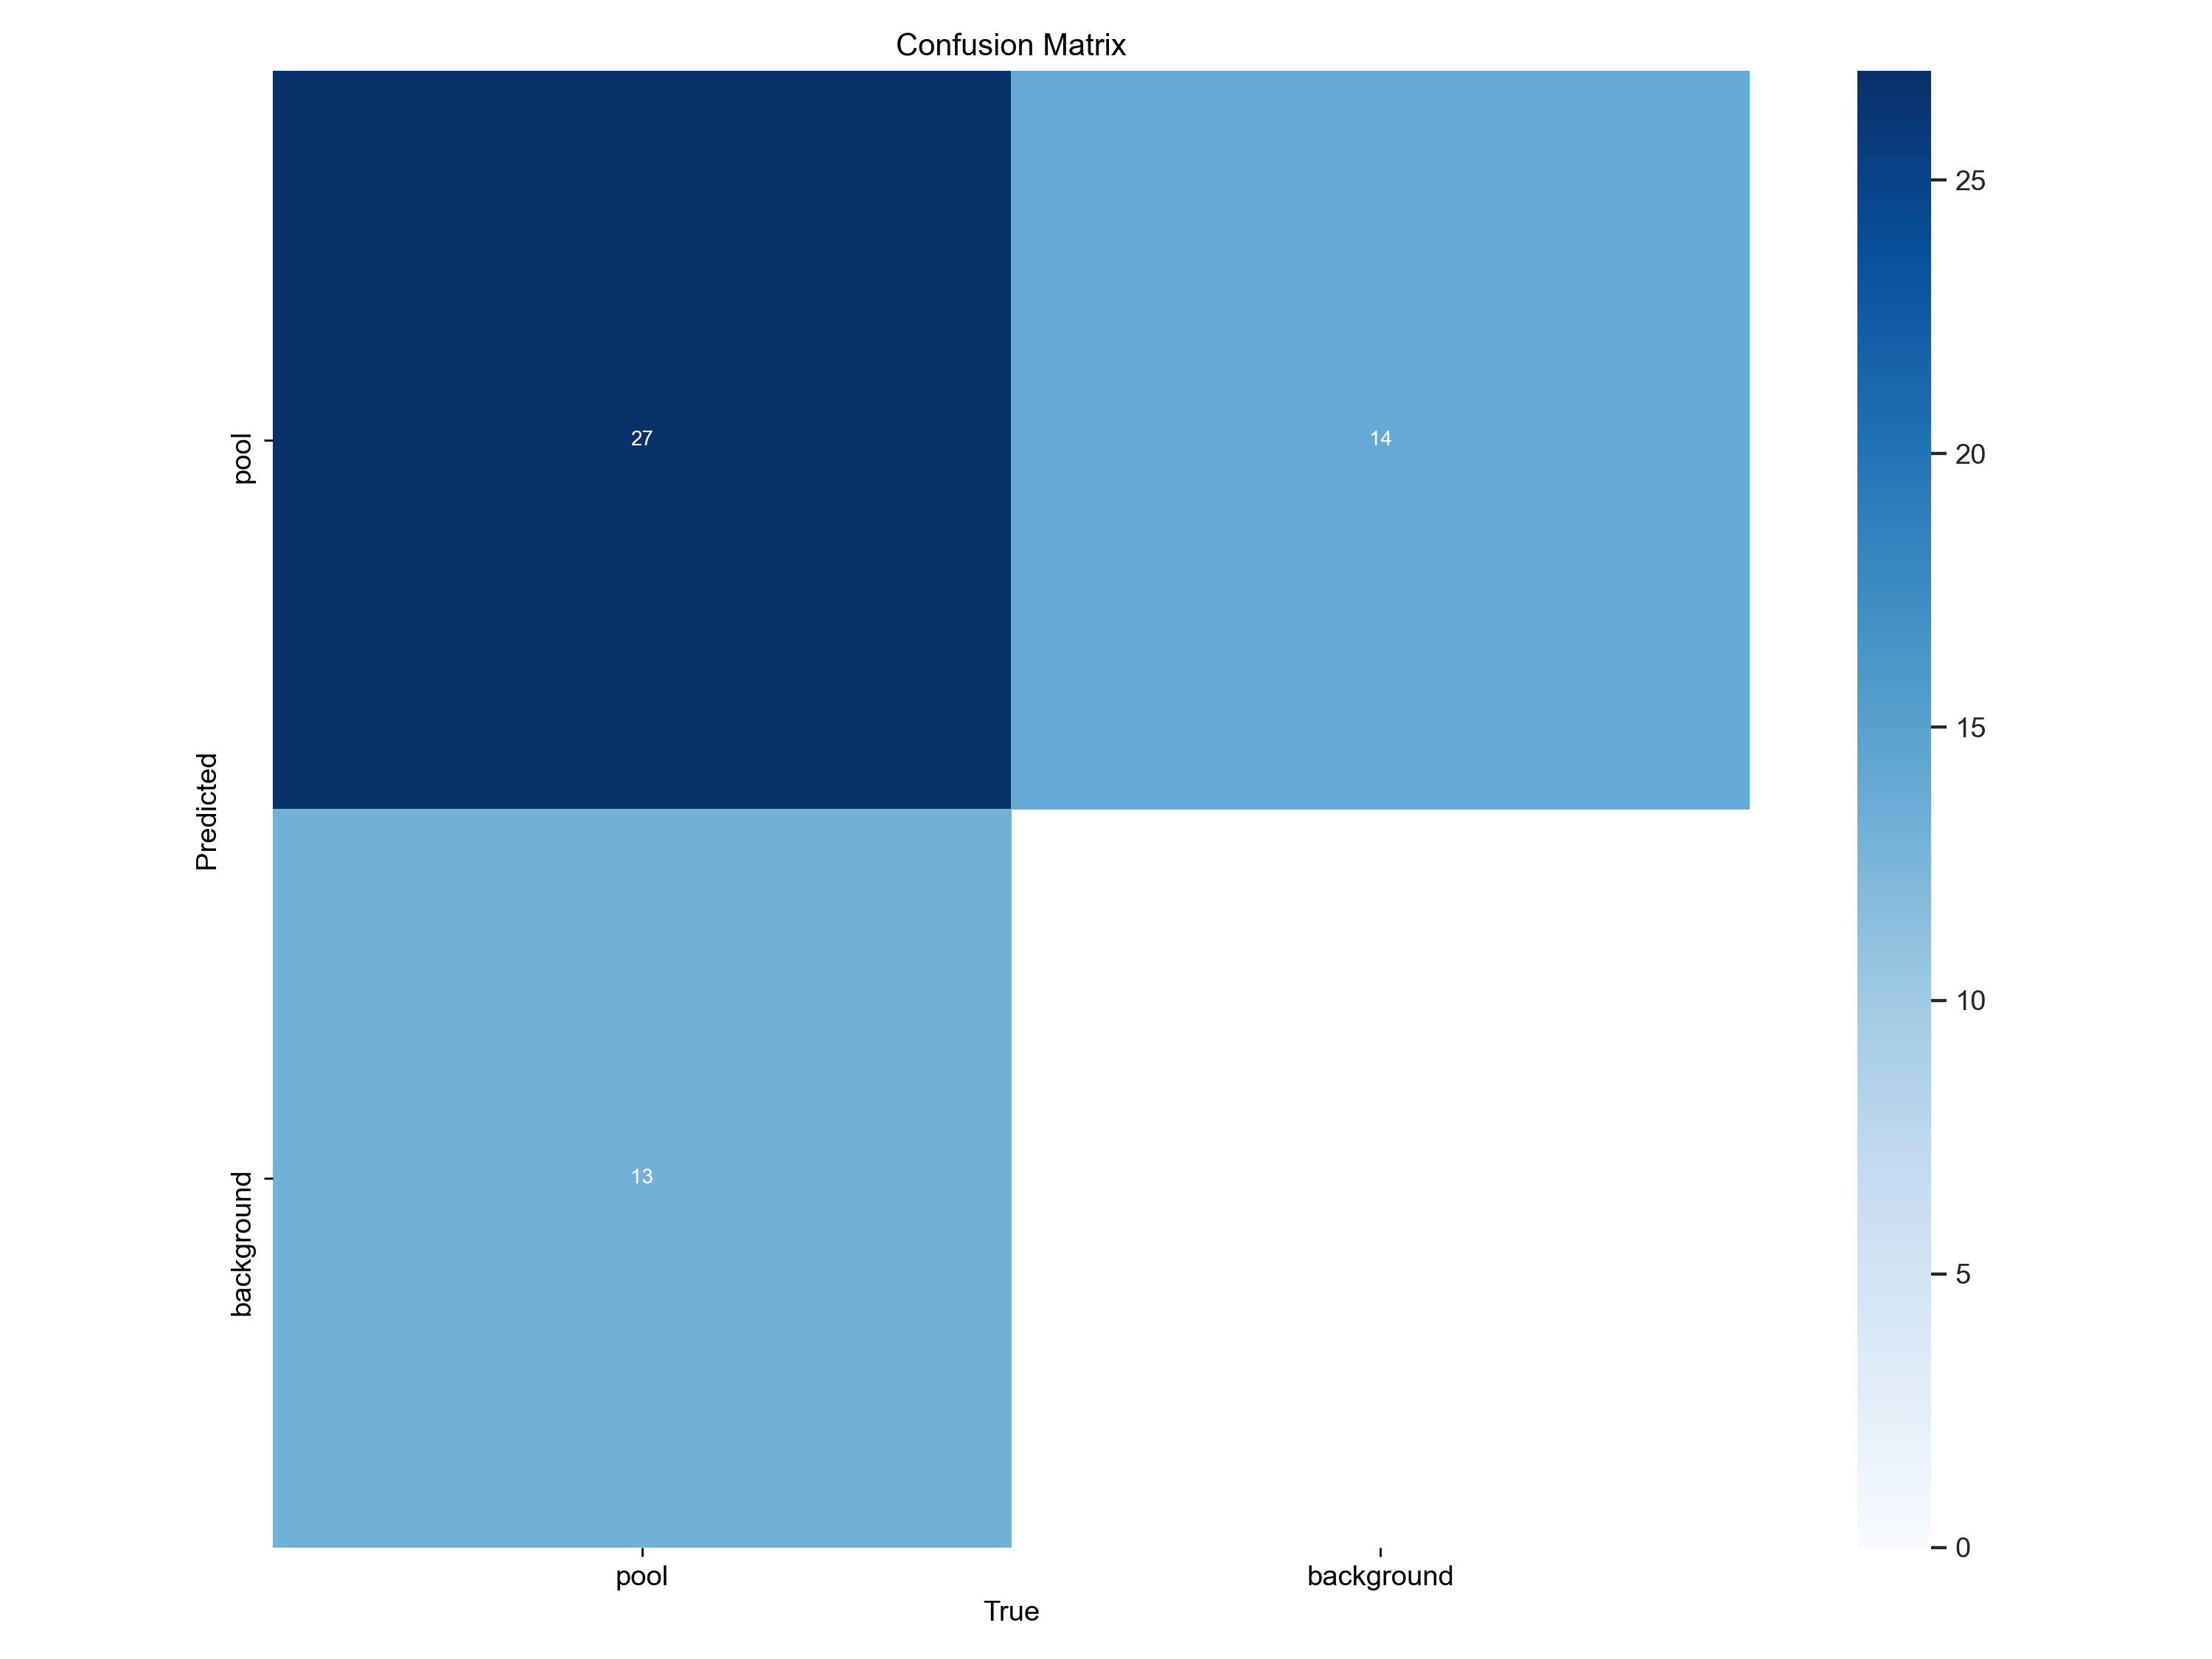

In [14]:
img = Image. open('runs/detect/train22222/confusion_matrix.png')
display(img)

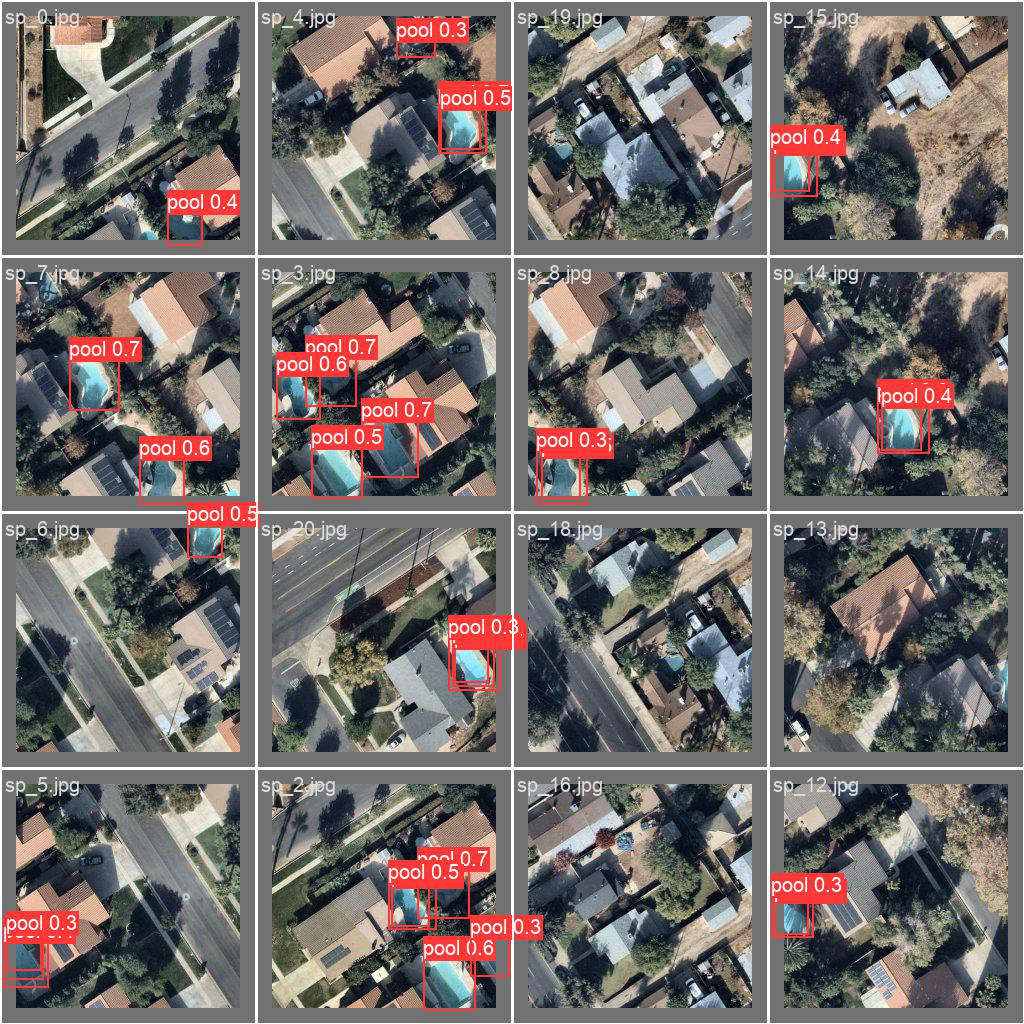

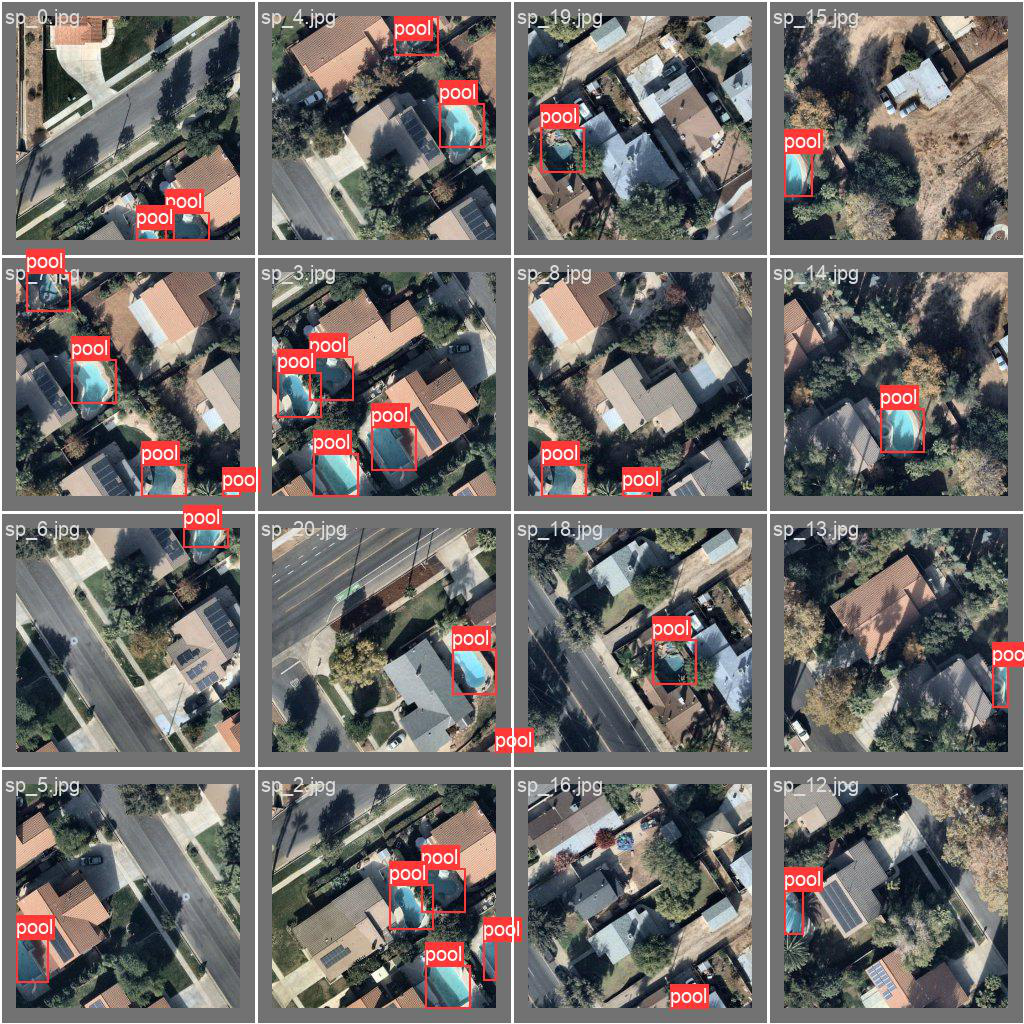

In [15]:
img2 = Image. open('runs/detect/train22222/val_batch0_pred.jpg')
display(img2)

img3 = Image. open('runs/detect/train22222/val_batch0_labels.jpg')
display(img3)